<a href="https://colab.research.google.com/github/anhtr/freeCodeCamp_projects/blob/master/scientific_computing_with_python/04_relational_databases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Relational databases**
- Model data by storing rows and columns in tables. The power of the relational database lies in it ability to efficiently retrieve data from those tables and in particular where there are multiple tables and the relationships between those table involved in the query.
- Terminology:
 + Database: contains many tables
 + Relation (or table): contains tuples and attributes
 + Tuple (or row): a set of fields that generally represents an "object" like a person or a music track.
 + Attribute (or column or field): one of possibly many elements of data corresponding to the object represented by the row.

**SQL**
- Structured Query Language is the language we use to issue commands to the database. Such as: create a table, retrieve some data, insert data, delete data.
- An imperative language where you simple say what you want and somebody else writes the loops to get the actual data. You don't see the loop and they are written to be very efficient.
- Create, read, update, delete (CRUD)

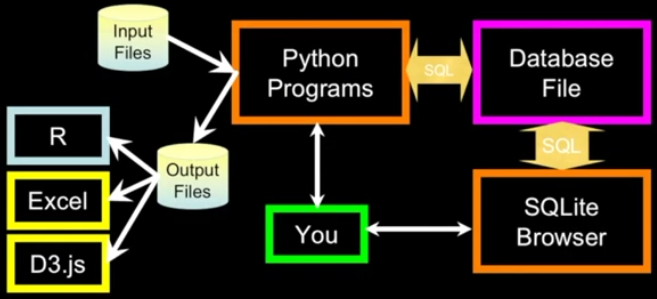

Make relational databases

In [15]:
import sqlite3
con = sqlite3.connect(':memory:')
cur = con.cursor()
cur.execute('''CREATE TABLE "Users" ("name" TEXT, "email" TEXT)''')
cur.executescript("""
INSERT INTO Users (name, email) VALUES ('Chuck', 'csev@umich.edu');
INSERT INTO Users (name, email) VALUES ('Colleen', 'cvl@umich.edu');
INSERT INTO Users (name, email) VALUES ('Ted', 'ted@umich.edu');
INSERT INTO Users (name, email) VALUES ('Sally', 'a1@umich.edu');
INSERT INTO Users (name, email) VALUES ('Ted', 'ted@umich.edu');
INSERT INTO Users (name, email) VALUES ('Kristen', 'kf@umich.edu')
""")
cur.execute("""DELETE FROM Users WHERE email='ted@umich.edu'""")
cur.execute("""UPDATE Users SET name="Charles" WHERE email='csev@umich.edu'""")

In [20]:
for row in cur.execute("""SELECT * FROM Users"""):
  print(row)

('Charles', 'csev@umich.edu')
('Colleen', 'cvl@umich.edu')
('Sally', 'a1@umich.edu')
('Kristen', 'kf@umich.edu')


In [21]:
for row in cur.execute("""SELECT * FROM Users WHERE email='csev@umich.edu'"""):
  print(row)

('Charles', 'csev@umich.edu')


In [22]:
for row in cur.execute("""SELECT * FROM Users ORDER BY email"""):
  print(row)

('Sally', 'a1@umich.edu')
('Charles', 'csev@umich.edu')
('Colleen', 'cvl@umich.edu')
('Kristen', 'kf@umich.edu')


In [23]:
for row in cur.execute("""SELECT * FROM Users ORDER BY name DESC"""):
  print(row)

('Sally', 'a1@umich.edu')
('Kristen', 'kf@umich.edu')
('Colleen', 'cvl@umich.edu')
('Charles', 'csev@umich.edu')


**Database design**
- Breaking applications into table require skills and experiences. The more complex ones are very context-dependent.
- Goal is to avoid really bad mistakes and design clean and easy to understand databases.
- Others may performance tune things later.

Building data model:
- drawing a picture of the data objects for our application and then figuring out how to represent the objects and their relationships.
- Basic rule: don't put the same string data in twice, use a relationship instead.
- When there is one thing in the "real world" there should be one copy of that thing in the database.

Database normalization:
- There is tons of database theory.
- Do not replicate data, reference/point at data instead.
- Use integers for keys and for references.
- Ad a special "key" column to each table whoch we will make reference to. By convention, many programmer call this column "id"
  + Primary key: generally an integer auto-increment field.
  + Logical key: what outside world uses for lookup
  + Foreign key: generally an integer key pointing to a row in another table.
- Key rules:
  + Never use logical key as the primary key.
  + Logical keys can and do changes, albeit slowly.
  + Relationship that are based on matching string fields are less efficient than integers.

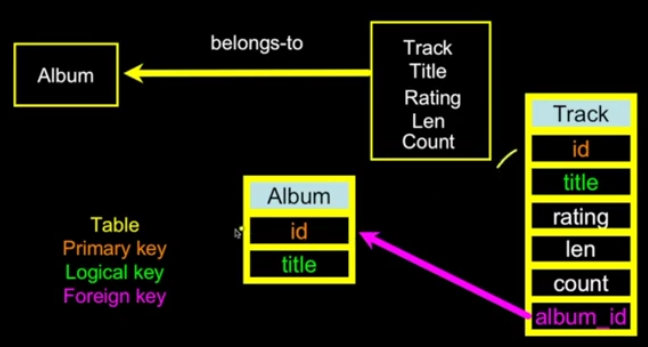

In [26]:
import sqlite3
con = sqlite3.connect(':memory:')
cur = con.cursor()
cur.executescript("""
CREATE TABLE "Artist" (
    "id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL UNIQUE, 
    "name" TEXT);

CREATE TABLE "Album" (
    "id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL UNIQUE, 
    artist_id INTEGER,
    "title" TEXT);

CREATE TABLE "Genre" (
    "id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL UNIQUE, 
    "name" TEXT);

CREATE TABLE "Track" (
    "id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL UNIQUE, 
    album_id INTEGER, genre_id INTEGER, len INTEGER, rating INTEGER, 
    "title" TEXT, "count" INTEGER)""")

cur.executescript("""
INSERT INTO Artist (name) VALUES ('Led Zepplin');
INSERT INTO Artist (name) VALUES ('AC/DC');

INSERT INTO Genre (name) VALUES ('Rock');
INSERT INTO Genre (name) VALUES ('Metal');

INSERT INTO Album (title, artist_id) VALUES ('Who Made Who', 2);
INSERT INTO Album (title, artist_id) VALUES ('IV', 1);

INSERT INTO Track (title, rating, len, count, album_id, genre_id) 
    VALUES ('Black Dog', 5, 297, 0, 2, 1);
INSERT INTO Track (title, rating, len, count, album_id, genre_id) 
    VALUES ('Stairway', 5, 482, 0, 2, 1);
INSERT INTO Track (title, rating, len, count, album_id, genre_id) 
    VALUES ('About to Rock', 5, 313, 0, 1, 2);
INSERT INTO Track (title, rating, len, count, album_id, genre_id) 
    VALUES ('Who Made Who', 5, 207, 0, 1, 2);""")

In [27]:
for row in cur.execute("""SELECT Album.title, Artist.name FROM Album JOIN Artist 
    ON Album.artist_id = Artist.id"""):
  print(row)

('Who Made Who', 'AC/DC')
('IV', 'Led Zepplin')


In [28]:
for row in cur.execute("""SELECT Album.title, Album.artist_id, Artist.id, Artist.name 
    FROM Album JOIN Artist ON Album.artist_id = Artist.id"""):
  print(row)

('Who Made Who', 2, 2, 'AC/DC')
('IV', 1, 1, 'Led Zepplin')


In [29]:
for row in cur.execute("""SELECT Track.title, Track.genre_id, Genre.id, Genre.name 
    FROM Track JOIN Genre"""):
  print(row)

('Black Dog', 1, 1, 'Rock')
('Black Dog', 1, 2, 'Metal')
('Stairway', 1, 1, 'Rock')
('Stairway', 1, 2, 'Metal')
('About to Rock', 2, 1, 'Rock')
('About to Rock', 2, 2, 'Metal')
('Who Made Who', 2, 1, 'Rock')
('Who Made Who', 2, 2, 'Metal')


In [30]:
for row in cur.execute("""SELECT Track.title, Genre.name FROM Track JOIN Genre 
    ON Track.genre_id = Genre.id"""):
  print(row)

('Black Dog', 'Rock')
('Stairway', 'Rock')
('About to Rock', 'Metal')
('Who Made Who', 'Metal')


In [31]:
for row in cur.execute("""SELECT Track.title, Artist.name, Album.title, Genre.name 
FROM Track JOIN Genre JOIN Album JOIN Artist 
    ON Track.genre_id = Genre.id AND Track.album_id = Album.id 
    AND Album.artist_id = Artist.id"""):
  print(row)

('Black Dog', 'Led Zepplin', 'IV', 'Rock')
('Stairway', 'Led Zepplin', 'IV', 'Rock')
('About to Rock', 'AC/DC', 'Who Made Who', 'Metal')
('Who Made Who', 'AC/DC', 'Who Made Who', 'Metal')


Many to many:
- Sometimes we need to model a relationship that is many to many.
- We need to add a "connection" table with two foreign keys.
- Usually not separate primary key.

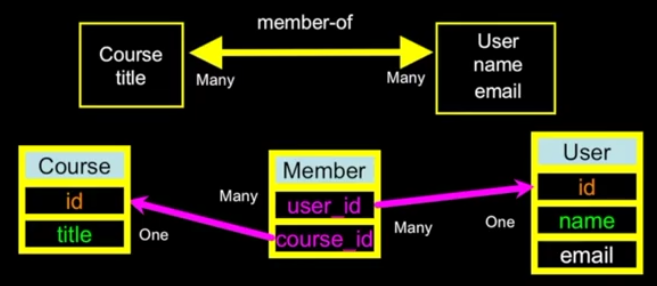

In [36]:
import sqlite3
con = sqlite3.connect(':memory:')
cur = con.cursor()
cur.executescript("""
CREATE TABLE User (
    id     INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name   TEXT UNIQUE,
    email  TEXT
) ;

CREATE TABLE Course (
    id     INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    title  TEXT UNIQUE
) ;

CREATE TABLE Member (
    user_id     INTEGER,
    course_id   INTEGER,
	role        INTEGER,
    PRIMARY KEY (user_id, course_id)
) ;
""")
cur.executescript("""
INSERT INTO User (name, email) VALUES ('Jane', 'jane@tsugi.org');
INSERT INTO User (name, email) VALUES ('Ed', 'ed@tsugi.org');
INSERT INTO User (name, email) VALUES ('Sue', 'sue@tsugi.org');

INSERT INTO Course (title) VALUES ('Python');
INSERT INTO Course (title) VALUES ('SQL');
INSERT INTO Course (title) VALUES ('PHP');

INSERT INTO Member (user_id, course_id, role) VALUES (1, 1, 1);
INSERT INTO Member (user_id, course_id, role) VALUES (2, 1, 0);
INSERT INTO Member (user_id, course_id, role) VALUES (3, 1, 0);

INSERT INTO Member (user_id, course_id, role) VALUES (1, 2, 0);
INSERT INTO Member (user_id, course_id, role) VALUES (2, 2, 1);

INSERT INTO Member (user_id, course_id, role) VALUES (2, 3, 1);
INSERT INTO Member (user_id, course_id, role) VALUES (3, 3, 0);
""")

In [37]:
for row in cur.execute("""
SELECT User.name, Member.role, Course.title
  FROM User JOIN Member JOIN Course
  ON Member.user_id = User.id AND Member.course_id = Course.id
  ORDER BY Course.title, Member.role DESC, User.name 
"""):
  print(row)

('Ed', 1, 'PHP')
('Sue', 0, 'PHP')
('Jane', 1, 'Python')
('Ed', 0, 'Python')
('Sue', 0, 'Python')
('Ed', 1, 'SQL')
('Jane', 0, 'SQL')


In [38]:
con.close()